# Introduction

# Simulate the data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import binomial, normal
from scipy.stats import bernoulli, binom

np.random.seed(37)
sns.set(color_codes=True)

n = 10000
X = np.hstack([
    np.array([1 for _ in range(n)]).reshape(n, 1), 
    normal(0.0, 1.0, n).reshape(n, 1), 
    normal(0.0, 1.0, n).reshape(n, 1)
])
z = np.dot(X, np.array([1.0, 2.0, 3.0])) + normal(0.0, 1.0, n)
p = 1.0 / (1.0 + np.exp(-z))
y = binom.rvs(1, p)

Text(0,0.5,'$x_1$')

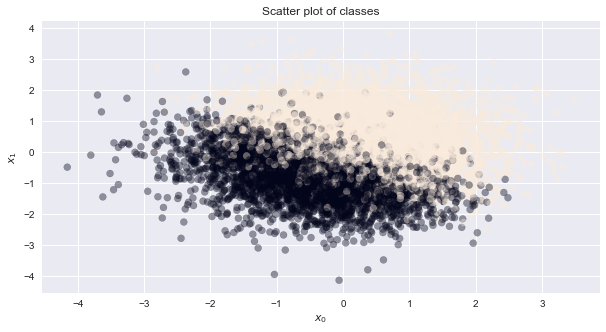

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=False, sharey=False)

ax.scatter(X[:, 1], X[:, 2], c=y, alpha=0.4)
ax.set_title('Scatter plot of classes')
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

Text(0,0.5,'probability')

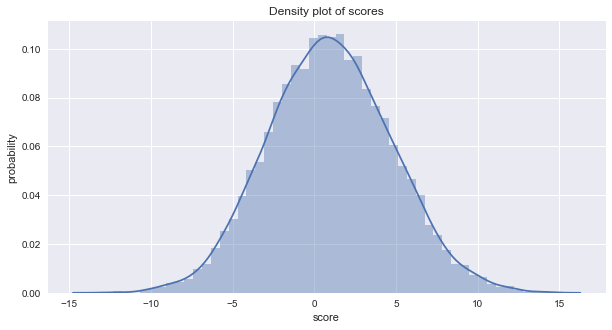

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=False, sharey=False)

sns.distplot(z, ax=ax)
ax.set_title('Density plot of scores')
ax.set_xlabel(r'score')
ax.set_ylabel(r'probability')

Text(0,0.5,'count')

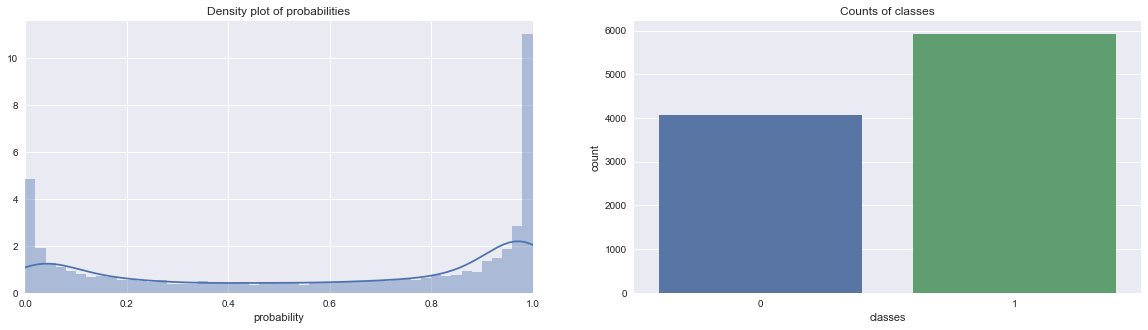

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=False, sharey=False)

sns.distplot(p, bins=50, ax=ax[0])
ax[0].set_title('Density plot of probabilities')
ax[0].set_xlabel(r'probability')
ax[0].set_xlim([0, 1])

sns.countplot(y, ax=ax[1])
ax[1].set_title('Counts of classes')
ax[1].set_xlabel(r'classes')
ax[1].set_ylabel(r'count')

# Use gradient descent through Autograd to learn the weights

In [6]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import exp, log, sqrt

In [7]:
# define the loss function
def loss(w, X, y):
    n = float(len(X))
    scores = np.dot(X, w) 
    return np.sum(-(scores * y) + log(1.0 + exp(scores))) / n

#the magic line that gives you the gradient of the loss function
loss_grad = grad(loss) 

In [8]:
alpha = 0.05
w = np.array([0.0 for _ in range(X.shape[1])])

In [9]:
print('initial weights = {}'.format(w))

loss_trace = []
weight_trace = []

for i in range(30000):
    loss = loss_grad(w, X, y)
    w = w - (loss * alpha)
    if i % 2000 == 0:
        print('{}: loss = {}, weights = {}'.format(i, loss, w))
    
    loss_trace.append(loss)
    weight_trace.append(w)
    
print('intercept + weights: {}'.format(w))

initial weights = [0. 0. 0.]
0: loss = [-0.0924     -0.18542858 -0.28379959], weights = [0.00462    0.00927143 0.01418998]
2000: loss = [-0.00085365 -0.00160161 -0.00240484], weights = [0.86208611 1.65618696 2.50347363]
4000: loss = [-7.61339030e-05 -1.42972522e-04 -2.14647474e-04], weights = [0.89377393 1.71566635 2.59277739]
6000: loss = [-7.28676025e-06 -1.36850486e-05 -2.05453476e-05], weights = [0.89670255 1.72116628 2.60103448]
8000: loss = [-7.01936802e-07 -1.31829762e-06 -1.97915602e-06], weights = [0.89698376 1.72169441 2.60182736]
10000: loss = [-6.76598221e-08 -1.27071061e-07 -1.90771353e-07], weights = [0.89701086 1.7217453  2.60190376]
12000: loss = [-6.52213280e-09 -1.22491365e-08 -1.83895869e-08], weights = [0.89701347 1.72175021 2.60191113]
14000: loss = [-6.28710761e-10 -1.18077402e-09 -1.77269189e-09], weights = [0.89701372 1.72175068 2.60191184]
16000: loss = [-6.06055583e-11 -1.13822396e-10 -1.70881529e-10], weights = [0.89701375 1.72175073 2.60191191]
18000: loss =

In [10]:
loss_trace = np.array(loss_trace)
weight_trace = np.array(weight_trace)

print(loss_trace.shape)
print(weight_trace.shape)

(30000L, 3L)
(30000L, 3L)


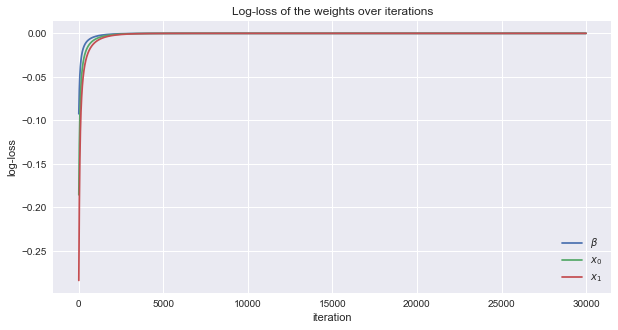

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Log-loss of the weights over iterations')
plt.xlabel('iteration')
plt.ylabel('log-loss')
plt.plot(loss_trace[:, 0], label=r'$\beta$')
plt.plot(loss_trace[:, 1], label=r'$x_0$')
plt.plot(loss_trace[:, 2], label=r'$x_1$')
plt.legend()

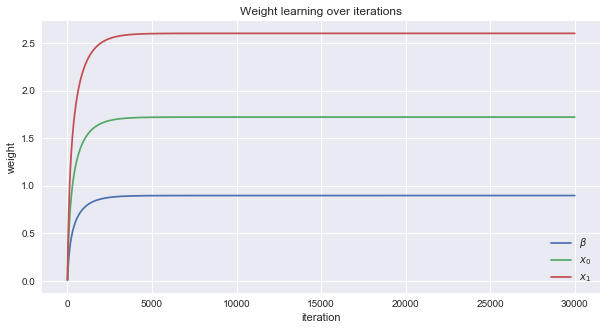

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Weight learning over iterations')
plt.xlabel('iteration')
plt.ylabel('weight')
plt.plot(weight_trace[:, 0], label=r'$\beta$')
plt.plot(weight_trace[:, 1], label=r'$x_0$')
plt.plot(weight_trace[:, 2], label=r'$x_1$')
plt.legend()

# Verify the results with scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False)
lr.fit(X, y)

print(lr.coef_)

[[0.89307796 1.71431569 2.59083718]]


# References

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://en.wikipedia.org/wiki/Logit
* http://people.seas.harvard.edu/~dduvenaud/papers/blackbox.pdf
* http://keyonvafa.com/logistic-regression-bbvi/
* https://beckernick.github.io/logistic-regression-from-scratch/
* http://www.hongliangjie.com/wp-content/uploads/2011/10/logistic.pdf
* http://www.robots.ox.ac.uk/~az/lectures/ml/2011/lect4.pdf
* https://stats.stackexchange.com/questions/46523/how-to-simulate-artificial-data-for-logistic-regression
* https://stats.stackexchange.com/questions/12857/generate-random-correlated-data-between-a-binary-and-a-continuous-variable/12858#12858